In [1]:
import numpy as np 
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats
import sklearn
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from collections import defaultdict

In [2]:
data_dir1 = "./Dataset Version 1/jester-data-1.xls"
data_dir2 = "./Dataset Version 1/jester-data-2.xls"
data_dir3 = "./Dataset Version 1/jester-data-3.xls"
df1 = pd.read_excel(data_dir1, header=None)
df2 = pd.read_excel(data_dir2, header=None)
df3 = pd.read_excel(data_dir3, header=None)
df = df1.append(df2).append(df3)
# df = pd.DataFrame(pd.read_excel(data_dir))

In [3]:
df.index = range(df.shape[0])
df.index.name = "User ID"
col_names = ["joke"+str(i) for i in range(1, df.shape[1])]
df.columns = ["NumRated"] + col_names
df[df==99.0] = np.nan
df = df.loc[:, df.columns != "NumRated"]
df.head(6)
df_gauge = df[["joke7", "joke8", "joke13", "joke15", "joke16", "joke17", "joke18", "joke19"]].copy() #[7, 8, 13, 15, 16, 17, 18, 19] 
df.head(6)

,joke1,joke2,joke3,joke4,joke5,joke6,joke7,joke8,joke9,joke10,...,joke91,joke92,joke93,joke94,joke95,joke96,joke97,joke98,joke99,joke100
User ID,,,,,,,,,,,,,,,,,,,,,
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45


[Text(0.5, 0, 'Mean rating per user'), Text(0, 0.5, 'Count')]

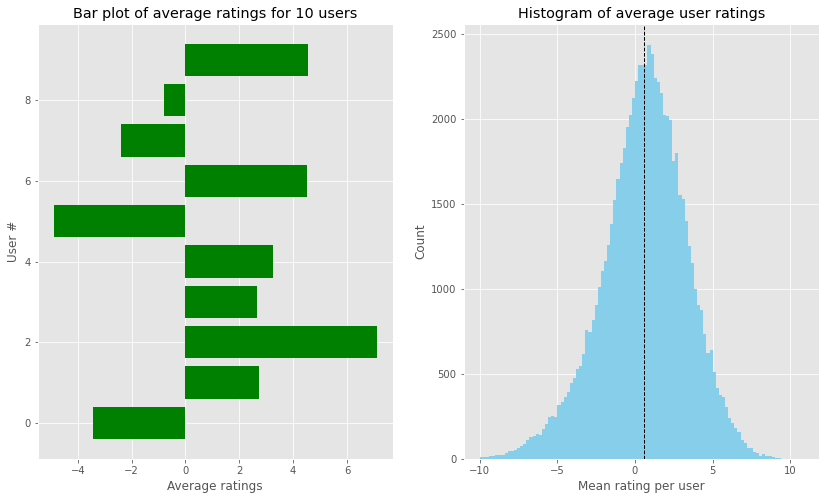

In [7]:
avg_joke_rating = np.nanmean(df,axis=0)
each_user_avg = np.nanmean(df,axis=1)
fig=plt.figure(figsize=(14,8)) 
plt.style.use('ggplot')
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax2.hist(each_user_avg, np.arange(-10,11,0.2), color = "skyblue")
ax1.barh(np.arange(0,10),each_user_avg[:10], color='green')
ax1.set_title('Bar plot of average ratings for 10 users')
ax1.set(ylabel='User #', xlabel='Average ratings')
ax2.set_title('Histogram of average user ratings')
ax2.axvline(each_user_avg.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
# ax2.text(each_user_avg.mean()*1.1, max_ylim*0.96), 'Mean: {:.2f}'.format(each_user_avg.mean())) #mean = 0.6 
ax2.set(xlabel='Mean rating per user', ylabel='Count')

Text(0, 0.5, 'Average rating')

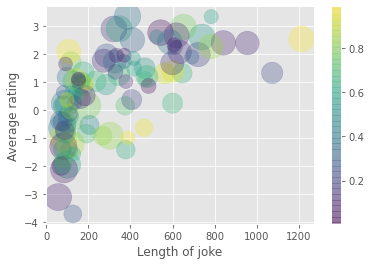

In [25]:
def to_len(word): 
    return len(word)
rng = np.random.RandomState(0)
colors = rng.rand(100)
joke_lens = list(map(to_len, joke_corpus))
joke_rate_count = list(df.count())
sizes = joke_rate_count
for i in range(len(sizes)): 
        sizes[i]/=100
fit = np.polyfit(np.array(joke_lens), np.array(avg_joke_rating), 3)
plt.scatter(joke_lens, avg_joke_rating,c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar(); 
plt.xlabel('Length of joke')
plt.ylabel('Average rating')

In [8]:
#normalization
import plotly.express as px
def normalize_data(dataframe): 
    mean_data = dataframe.sum(axis=1, numeric_only=True)/dataframe.count(1)
    mean_sub = dataframe.subtract(mean_data, axis='rows')
    mean_pow = mean_sub.pow(2, axis='columns')
    var = np.sqrt(mean_pow.sum(axis=1, numeric_only=True)/(mean_pow.count(1)-1))
    return mean_sub.divide(var, axis='rows')
    # return mean_sub
normalized_df = normalize_data(df)
normalized_df_gauge = normalize_data(df_gauge)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1469 samples in 0.001s...
[t-SNE] Computed neighbors for 1469 samples in 0.071s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1469
[t-SNE] Computed conditional probabilities for sample 1469 / 1469
[t-SNE] Mean sigma: 5.296730
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.736450
[t-SNE] KL divergence after 500 iterations: 1.900861
(1469, 2)


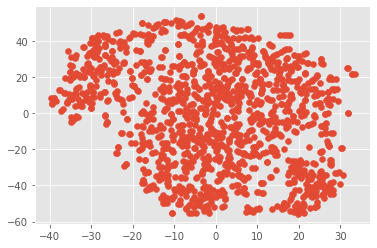

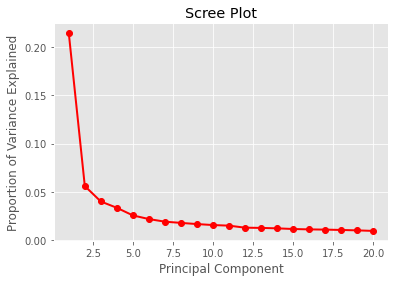

In [9]:
A = normalized_df.fillna(0.0).values
n_components = 20
pca = PCA(n_components=20)
pca.fit(A)
R = df.fillna(0.0).values.copy()
reduced_A = pca.fit_transform(R)
reduced_A_embedded = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=500).fit_transform(reduced_A[::50,:])
print(reduced_A_embedded.shape)
plt.scatter(reduced_A_embedded[:,0], reduced_A_embedded[:,1])
plt.show()
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

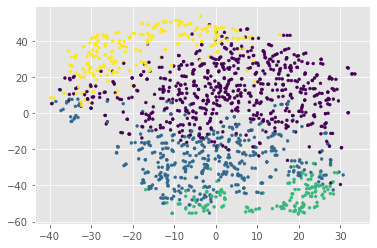

In [10]:
from sklearn.cluster import MiniBatchKMeans, KMeans 
from sklearn.metrics.pairwise import pairwise_distances_argmin 
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
batch_size = 50
n_clusters = 4

mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 4, max_iter=100000,batch_size = batch_size, n_init = 10, 
                      max_no_improvement = 10, verbose = 0) 
  
mbk.fit(reduced_A) 
y_kmeans = mbk.predict(reduced_A)
plt.scatter(reduced_A_embedded[:, 0], reduced_A_embedded[:, 1], c=y_kmeans[::50], s=8, cmap='viridis')

# model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
# model.fit(reduced_A[::100])
# labels = model.labels_
# plt.scatter(reduced_A_embedded[:,0], reduced_A_embedded[:,1], c=labels, s=5, cmap='viridis')

# model = GaussianMixture(n_components=4, random_state=0).fit(reduced_A)
# labels = model.predict(reduced_A)
# plt.scatter(reduced_A_embedded[:, 0], reduced_A_embedded[:, 1], c=labels[::100], s=5, cmap='viridis')

In [12]:
#similarity computation
import scipy
def pearson(new_user, dataframe): 
    d1 = np.nansum(np.square(new_user)) 
    d2 = np.nansum(np.square(dataframe),axis=1)
    sim = np.nan_to_num(np.nansum(dataframe*new_user, axis=1)/np.sqrt(d1*d2))
    most_similar = np.sort(sim)[-20:]
    most_similar_idx = np.argsort(sim)[-20:]
    return (most_similar, most_similar_idx)

def cosine_similarity(new_user,dataframe): 
    numerator = np.nansum(dataframe * new_user, axis=1)
    norm_user = np.sqrt(np.nansum(np.power(new_user, 2)))
    norm_df = np.sqrt(np.nansum(np.power(dataframe, 2), axis=1))
    sim = numerator / (norm_user * norm_df)
    sim = np.nan_to_num(sim)
    most_similar = np.sort(sim)[-20:]
    most_similar_idx = np.argsort(sim)[-20:]
    return (most_similar, most_similar_idx)

def get_top_smilar_jokes(most_similar, top_user_matrix): 
    scores_matrix = top_user_matrix.copy() 
    top_jokes = np.nansum(top_user_matrix.T * most_similar, axis=1)/np.sum(most_similar)
    top_5 = np.argsort(top_jokes)[-5:]
    return top_5 



Top 5 recommended jokes: [64 67 53 26 28]
Actual rankings given by the user:
joke65    2.82
joke68    8.30
joke54    8.30
joke27    7.82
joke29    9.13
Name: 0, dtype: float64
<ipython-input-12-70362b213695>:6: RuntimeWarning: invalid value encountered in true_divide
  sim = np.nan_to_num(np.nansum(dataframe*new_user, axis=1)/np.sqrt(d1*d2))


Text(0, 0.5, 'Jokes recommended')

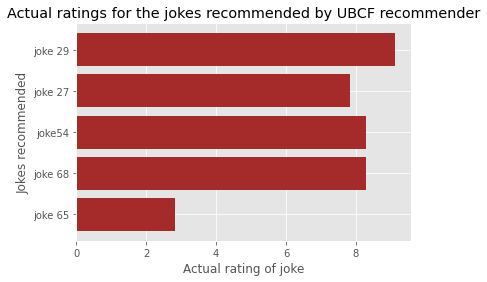

In [13]:
# gauge_set = [7, 8, 13, 15, 16, 17, 18, 19] #using PCA 
gauge_set = list(range(100))
new_user = normalized_df.iloc[0].copy() 
new_user[:] = np.nan
new_user.iloc[gauge_set] = normalized_df.iloc[0,gauge_set]
most_similar, most_similar_idx = pearson(new_user,normalized_df)
top_user_matrix = normalized_df.iloc[most_similar_idx].copy()
top_5 = get_top_smilar_jokes(most_similar, top_user_matrix)
print("Top 5 recommended jokes:", top_5)
print("Actual rankings given by the user:\n{}".format(df.iloc[0, list(top_5)]))
plt.style.use('ggplot')
plt.barh(["joke 65", "joke 68", "joke54", "joke 27", "joke 29"],list(df.iloc[0, list(top_5)]), color='brown')
plt.title('Actual ratings for the jokes recommended by UBCF recommender')
plt.xlabel('Actual rating of joke')
plt.ylabel('Jokes recommended')

In [29]:
#TF-IDF score calculation
jokes_dir = "jester_content.xlsx"
df_joke = pd.read_excel(jokes_dir, header=None)
num_jokes, _ = df_joke.values.shape
joke_corpus = []
for index in range(num_jokes):
    joke = df_joke.values[index, 0]
    joke_corpus.append(joke)
tf_idf_vectorizer = TfidfVectorizer(use_idf=True)
tf_idf_matrix = tf_idf_vectorizer.fit_transform(joke_corpus)
# print(len(tf_idf_vectorizer.get_feature_names()))
# print(tf_idf_matrix[79,:])
# print((np.array(tf_idf_matrix[79,:].todense()).tolist()[0]))
lst_df=[]
for elem in [57,15,14,43,12]: 
    df_tf_ratings = pd.DataFrame(tf_idf_matrix[elem,:].T.todense(),index=tf_idf_vectorizer.get_feature_names(), columns=["TF-IDF"]) 
    df_tf_ratings = df_tf_ratings.sort_values('TF-IDF', ascending=False)
    lst_df.append(df_tf_ratings)
d = defaultdict(float)
for i in lst_df:
    count=1
    for idx in i.index:
        d[idx]+=i['TF-IDF'][idx]
        count+=1
        if count==15: 
            break

              TF-IDF
shampoo     0.276485
lather      0.276485
shower      0.276485
repeat      0.276485
keep        0.276485
label       0.276485
rinse       0.276485
computer    0.276485
programmer  0.276485
give        0.225014
long        0.214772
day         0.198612
them        0.180723
all         0.167176
how         0.150022
with        0.144400
do          0.136899
says        0.130282
(30, 1559)


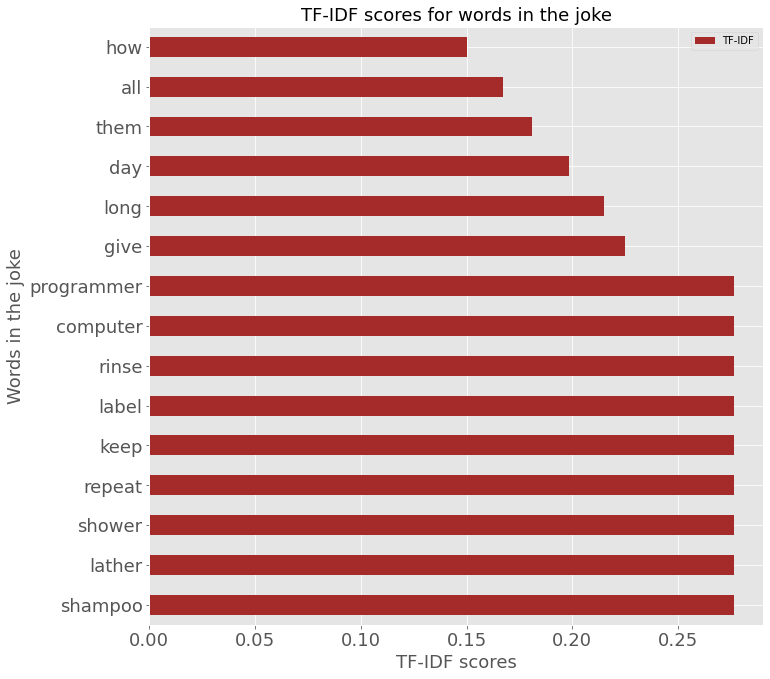

In [30]:
#TF-IDF scores of sample joke
df_tf_ratings_81 = pd.DataFrame(tf_idf_matrix[81,:].T.todense(),index=tf_idf_vectorizer.get_feature_names(), columns=["TF-IDF"]) 
df_tf_ratings_81 = df_tf_ratings_81.sort_values('TF-IDF', ascending=False)
print(df_tf_ratings_81[:18])
df_tf_ratings_81[:15].plot.barh(figsize=(11,11), color='brown')
plt.xlabel("TF-IDF scores", fontsize=18)
plt.ylabel("Words in the joke", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('TF-IDF scores for words in the joke', fontsize=18)
print(tf_idf_matrix.toarray()[70:,:].shape)

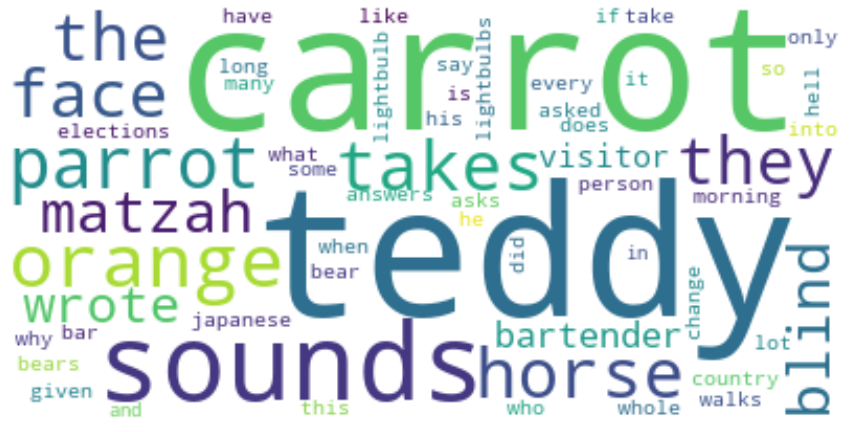

In [31]:
#word cloud of top 5 highest rated jokes 
Cloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(frequencies=d)
plt.figure(figsize=(15,15))
plt.imshow(Cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

((35, 1559), (1559,))
Top 5 recommended jokes: [34  1 13  5 27]
Actual user ratings for recommended jokes: joke35    5.05
joke2     8.79
joke14    8.45
joke6    -8.50
joke28    2.86
Name: 0, dtype: float64
<ipython-input-51-03bfcac32d27>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  user_profile = np.nanmean(tf_idf_dict * normalized_user[:, np.newaxis], axis=0)


Text(0, 0.5, 'Jokes recommended')

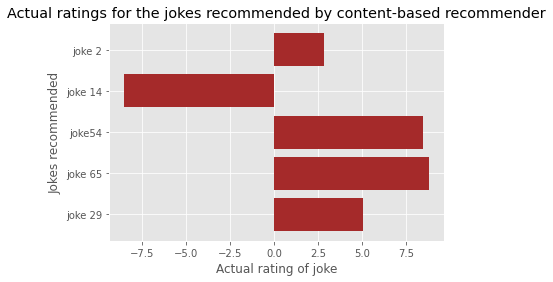

In [51]:
#content-based system
def content_based(normalized_user, tf_idf_dict, unseen_jokes, n=5):
    user_profile = np.nanmean(tf_idf_dict * normalized_user[:, np.newaxis], axis=0)
    norm_unseen = np.sqrt(np.nansum(np.power(unseen_jokes, 2), axis=1))
    norm_user = np.sqrt(np.nansum(np.power(user_profile, 2)))
    print((unseen_jokes.shape, user_profile.T.shape))
    #cosine similarity between user profile and unseen joke matrix
    dot_product = np.nansum(unseen_jokes * user_profile.T, axis=1)
    pred_rating = dot_product / (norm_unseen * norm_user)
    recommended_jokes = np.argsort(pred_rating)[-n:]
    return recommended_jokes, pred_rating
# tf_idf_matrix.todense().shape
known = 65
test_user = normalized_df.iloc[0,(100-known):]
recommended_jokes, predicted_rating = content_based(test_user, tf_idf_matrix.toarray()[(100-known):,:], tf_idf_matrix.toarray()[:(100-known),:], 5)
print("Top 5 recommended jokes:",recommended_jokes)
print("Actual user ratings for recommended jokes:", df.iloc[0, recommended_jokes]) #results from collab: [64 67 53 26 28]
plt.style.use('ggplot')
plt.barh(["joke 29", "joke 65", "joke54", "joke 14", "joke 2"],list(df.iloc[0, recommended_jokes]), color='brown')
plt.title('Actual ratings for the jokes recommended by content-based recommender')
plt.xlabel('Actual rating of joke')
plt.ylabel('Jokes recommended')